___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [4]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [5]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [6]:
df.columns = ['Sales']

In [7]:
df

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<AxesSubplot:xlabel='DATE'>

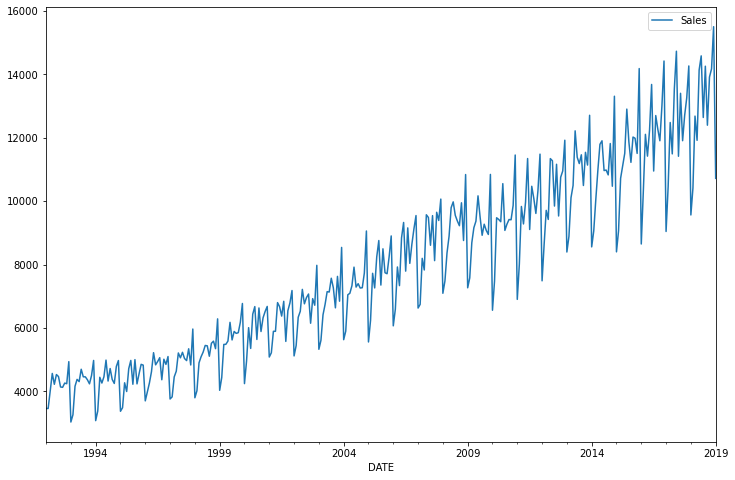

In [8]:
df.plot(figsize=(12,8))

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
results = seasonal_decompose(df['Sales'])

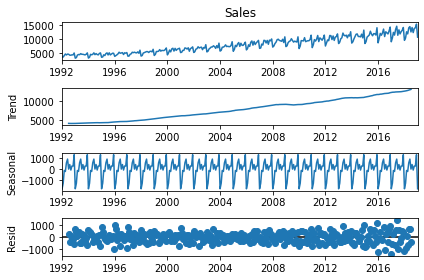

In [13]:
results.plot();

<AxesSubplot:xlabel='DATE'>

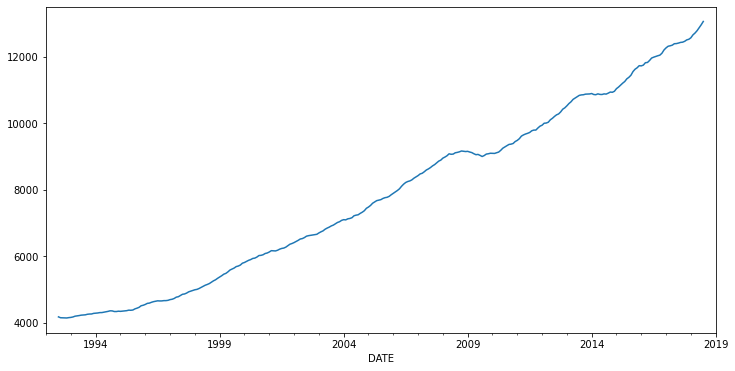

In [19]:
results.trend.plot(figsize=(12,6))

<AxesSubplot:xlabel='DATE'>

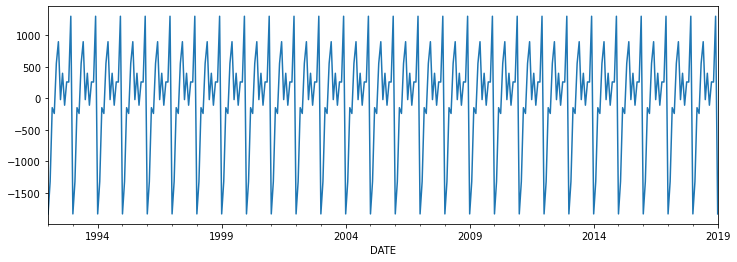

In [20]:
results.seasonal.plot(figsize=(12,4))

<AxesSubplot:xlabel='DATE'>

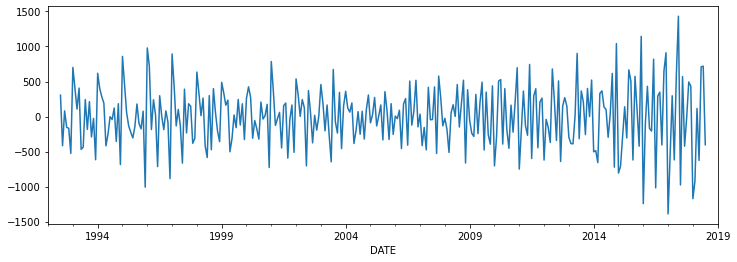

In [23]:
results.resid.plot(figsize=(12,4))

<AxesSubplot:xlabel='DATE'>

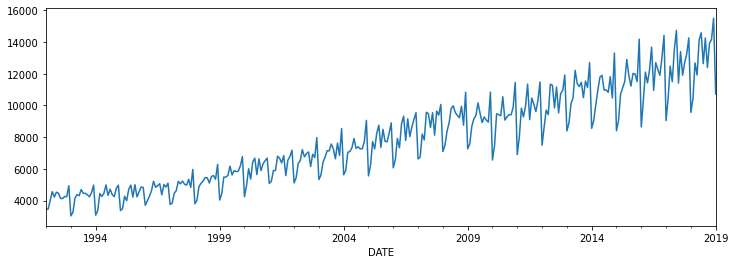

In [21]:
results.observed.plot(figsize=(12,4))

## Train Test Split

In [24]:
len(df)

325

In [25]:
325-12

313

In [26]:
train = df.iloc[:313]
test = df.iloc[313:]

In [27]:
len(test)

12

## Scale Data

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [31]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [32]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [33]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [34]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [35]:
len(scaled_train)

313

In [36]:
len(generator) # n_input = 2

311

In [37]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [38]:
generator[0]

(array([[[0.03658432],
         [0.03649885]]]),
 array([[0.08299855]]))

In [39]:
# What does the first batch look like?
X, y = generator[0]

In [40]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [46]:
# Let's redefine to get 6 months back and then predict the next month out
n_input = 6
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [47]:
generator[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513]]]),
 array([[0.12266006]]))

In [48]:
# What does the first batch look like?
X,y = generator[0]

In [49]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513]
Predict this y: 
 [[0.12266006]]


### Create the Model

In [51]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [52]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [53]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [55]:
# fit model
model.fit_generator(generator, epochs=25)

<ipython-input-55-8921ad9c694f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=25)


Epoch 1/25
307/307 [==============================] - 2s 3ms/step - loss: 0.0162
Epoch 2/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0096
Epoch 3/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0092A: 0s 
Epoch 4/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 5/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0089
Epoch 6/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0100
Epoch 7/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0087
Epoch 8/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 9/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0087A: 0s - loss: 0
Epoch 10/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0090A: 0s - loss: 0.00
Epoch 11/25
307/307 [==============================] - 1s 3ms/step - loss: 0.0080
Epoch 12/25
307/307 [==============================] - 1s 3ms/step -

In [56]:
model.history.history.keys()

dict_keys(['loss'])

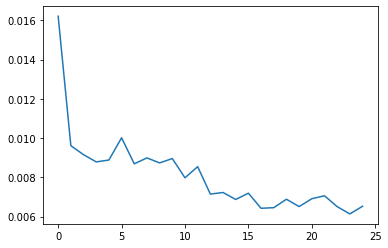

In [57]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

## Evaluate on Test Data

In [ ]:
# 12 history steps --> step 13
# Last 12 points train --> pt 1 of test data

In [58]:
first_eval_batch = scaled_train[-12:]

In [59]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [60]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features)) # 1 means single

In [61]:
model.predict(first_eval_batch)

array([[0.8101335]], dtype=float32)

In [62]:
scaled_test[0]

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

## Forecast Using RNN Model

In [63]:
# holding my predictions
test_predictions = []

# Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [64]:
current_batch.shape

(1, 12, 1)

In [65]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [66]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [67]:
test_predictions = []

# Last n_input points from the training set
first_eval_batch = scaled_train[-n_input:]
# reshape this to the format RNN wants (same format as TimeseriesGenerator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# how far into the future will I forecast?
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [70]:
my_first_pred = model.predict(current_batch)[0]

In [71]:
my_first_pred

array([0.90509605], dtype=float32)

In [72]:
current_batch.shape

(1, 12, 1)

In [73]:
current_batch[:,1:,:]

array([[[0.82204264],
        [0.83637035],
        [0.90854841],
        [0.9948259 ],
        [0.8776443 ],
        [0.90738994],
        [0.90075445],
        [0.92850327],
        [0.95622653],
        [0.98443729],
        [0.90120339]]])

In [74]:
np.append(current_batch[:,1:,:], [[my_first_pred]], axis=1)

array([[[0.82204264],
        [0.83637035],
        [0.90854841],
        [0.9948259 ],
        [0.8776443 ],
        [0.90738994],
        [0.90075445],
        [0.92850327],
        [0.95622653],
        [0.98443729],
        [0.90120339],
        [0.90509605]]])

## Inverse Transformations and Compare

In [75]:
true_predictions = scaler.inverse_transform(test_predictions)

In [76]:
true_predictions

array([[12508.75201291],
       [12648.07689244],
       [12815.69671214],
       [13660.10790366],
       [14669.46819943],
       [13298.56067109],
       [13646.55489439],
       [13568.92633104],
       [13893.55981326],
       [14217.89414746],
       [14547.9318189 ],
       [13574.17850566]])

In [77]:
test

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [78]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-78-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [79]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,12508.752013
2018-03-01,12683,12648.076892
2018-04-01,11919,12815.696712
2018-05-01,14138,13660.107904
2018-06-01,14583,14669.468199
2018-07-01,12640,13298.560671
2018-08-01,14257,13646.554894
2018-09-01,12396,13568.926331
2018-10-01,13914,13893.559813


<AxesSubplot:xlabel='DATE'>

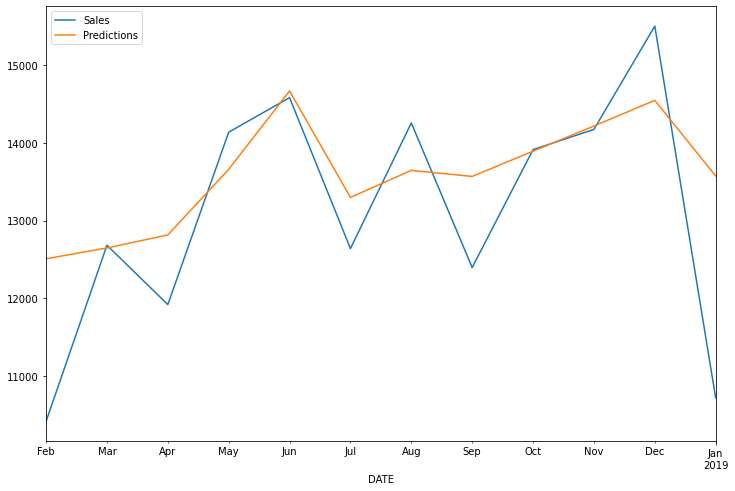

In [80]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [81]:
model.save('my_rnn_model.h5')

## load a model

In [82]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [83]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
